In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import quad

Primero para el problema necesitamos los puntos de luminosidad donde la pupila alcanza su valor máximo y mínimo, los cuales llamaremos a dados puntos $(a,T), (b,t)$ con las cuatro entradas no negativas. Por conveniencia la función tendrá dominio en $[0,\infty )$ y dado que los puntos $(a,T),(b,t)$ son los puntos máximos y mínimos tenemos dos condiciones extras: <br> $ \forall x \in [0,\infty) \text{si } x< a \text{ entonces } f(x) = T $ ,  $ \forall x \in [0,\infty) \text{si }x> b \text{ entonces } f(x) = t$  <br> Así, la función <em> pupil_size </em> es una función basada en un polinomio de grado 3 ajustado a los puntos máximo y mínimo deseados $T,t \in \mathbb{R}$ respectivamente. El ajuste para crear una función decreciente y suave en el intervalo $[a,b]$ lo obtenemos mediante un sistema lineal de 4x4 donde queremos que el polinomio coincida con los puntos $(a,T),(b,t)$ y queremos que las derivadas en dados puntos sean cero. Sea $a_3x^3 + a_2x^2 + a_1x + a_0$ tal polinomio con coeficientes reales. <br> <br>
$\begin{pmatrix} x^3_1 & x^2_1 & x_1 & 1   \\ x^3_2 & x^2_2 & x_2 & 1 \\ 3x^2_1 & 2x_1 & 1 & 0 \\ 3x^2_2 & 2x_2 & 1 & 0  \end{pmatrix} \begin{pmatrix} a_3 \\ a_2 \\a_1 \\a_0 \end{pmatrix} = \begin{pmatrix} y_1 \\ y_2 \\ 0 \\ 0 \end{pmatrix}$donde $(x_1,y_1) = (a,T)$ y $(x_2,y_2) = (b,t)$. El determinante de la matriz es $-(x_1-x_2)^4$ por lo que tiene inversa siempre pues $a < b$, por lo que buscamos la solución $\overline{x} = A^{-1}\overline{b}$ y obtenemos los coeficientes de la función deseada. <br>
Debemos notar que estamos generando un polinomio de grado 3 con dos puntos criticos en $a,b$ exactamente , por lo que en el intervalo $[a,b]$ la derivada es diferente de cero. Más aún, por la misma razón y debido a que $f(a) > f(b)$ por construcción entonces la función en el intervalo $[a,b]$ es estrictamente decreciente. Usaremos el metodo np.linalg.solve para resolver este problema.

In [2]:
def recta_c(a,b,t,T,x):
    c_a = (a-b)/2 + ((a-b)/2)**3 /3 + T 
    c_b = (b-a)/2 + ((b-a)/2)**3 /3 + t 

    return (c_b - c_a)/(b - a)*(x - a) + c_a 
def pupil_poly(a,b,t,T):
    A = np.array([[a**3,a**2,a,1],[b**3,b**2,b,1],[3*(a**2),2*a,1,0],[3*(b**2),2*b,1,0]])
    b = np.array([[T],[t],[0],[0]])
    X = np.linalg.solve(A,b)
    return X
def pupil_size(a,b,t,T,X,x):
    return X[0]*(x**3) + X[1]*(x**2) + X[2]*x +X[3]


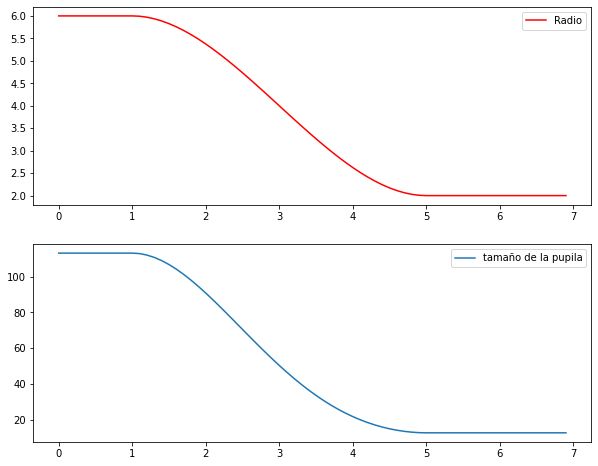

In [3]:
a,b,t,T = 1,5,2,6


fig,ax = plt.subplots(2,figsize=(10,8))
X = np.arange(0,7,.1)
f = pupil_poly(a,b,t,T)
Y = pupil_size(a,b,t,T,f,X)
#Condicion de valores limites
for i in range(len(Y)):
    if X[i] <= a:
        Y[i] = T 
    if X[i] >= b:
        Y[i] = t

"""
Para conocer el tamaño de la pupila efectuamos un cálculo donde Y es el radio 
"""

S = np.pi*(Y**2)
ax[0].plot(X,Y,color="red")
ax[0].legend(['Radio'])
ax[1].plot(X,S)
ax[1].legend(['tamaño de la pupila'])
plt.show()

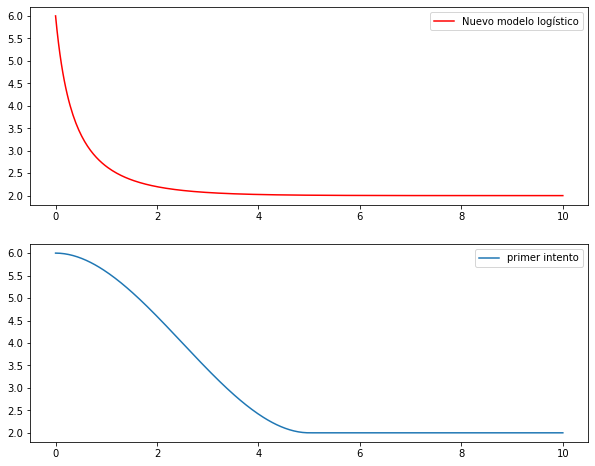

In [8]:
"""Actualización 1
--  Cambio de metodo polinomial -> logístico 

Debido a la naturaleza de la opción anterior, donde un polinomio de grado 3 cuando tiende a valores pasando el punto (b,t) se vuelve inestable y por tanto debemos contenerlo haciendo la función constante, 
se plantea un cambio de enfoque a una ecuación logística, donde la capacidad de carga es el radio mínimo de la pupila (R). Esto nos beneficia pues nos da un enfoque más natural y conocido en el modelo, además de que
ajustar mediante puntos clave (a,T) (b,t) genera una gráfica muy "forzada y holgada" en los puntos intermedios, en vez de tener un decrecimiento rápido como sucede con el experimento real.
Para fines de ajuste consideramos el punto de máximo radio de la pupila cuando el valor de luz sea 0.
"""
#Ecuación logistica -- argumentos (x0 -> radio máximo a luminosidad minima, x -> arreglo de numeros , k -> ritmo de decrecimiento de pupila (1 por default) , R -> radio mínimo)
# 
# 
def f(x0,x,k,R):
    return (R*x0)/(x0 + (R - x0)*np.exp(-k*x))
    a,b,t,T = 1,5,2,6

T , k , R = 6 , 1 , 3

fig,ax = plt.subplots(2,figsize=(10,8))
X = np.linspace(0,10,350)
B = f(T,X,k,R)

a , b , T, t = 0 , 5, 6, 2 

F = pupil_poly(a,b,t,T)
Y = pupil_size(a,b,t,T,F,X)
#Condicion de valores limites
for i in range(len(Y)):
    if X[i] <= a:
        Y[i] = T 
    if X[i] >= b:
        Y[i] = t
ax[0].plot(X,B, color = 'red')
ax[0].legend(['Nuevo modelo logístico'])
ax[1].plot(X,Y)
ax[1].legend(['primer intento'])
plt.show()